In [1]:
import my_plotting
import markers
import importlib
import utils
import covax_constants
import GeneModules

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

import warnings
warnings.simplefilter("ignore")


import scanpy as sc

In [2]:
ct = 'Monocyte CD16-2'
adata = sc.read_h5ad(f'{ct}.h5ad')


In [3]:
adata = adata[adata.obs.new_subset_annotations_2 != 'Doublet'].copy()

In [4]:
adata_vc = utils.clean_visits(adata)

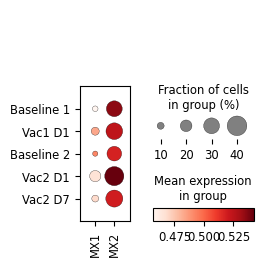

In [5]:
sc.pl.dotplot(adata_vc[adata_vc.obs.Vaccine!='J&J'], ['MX1', 'MX2',], groupby='Visit', mean_only_expressed=True)

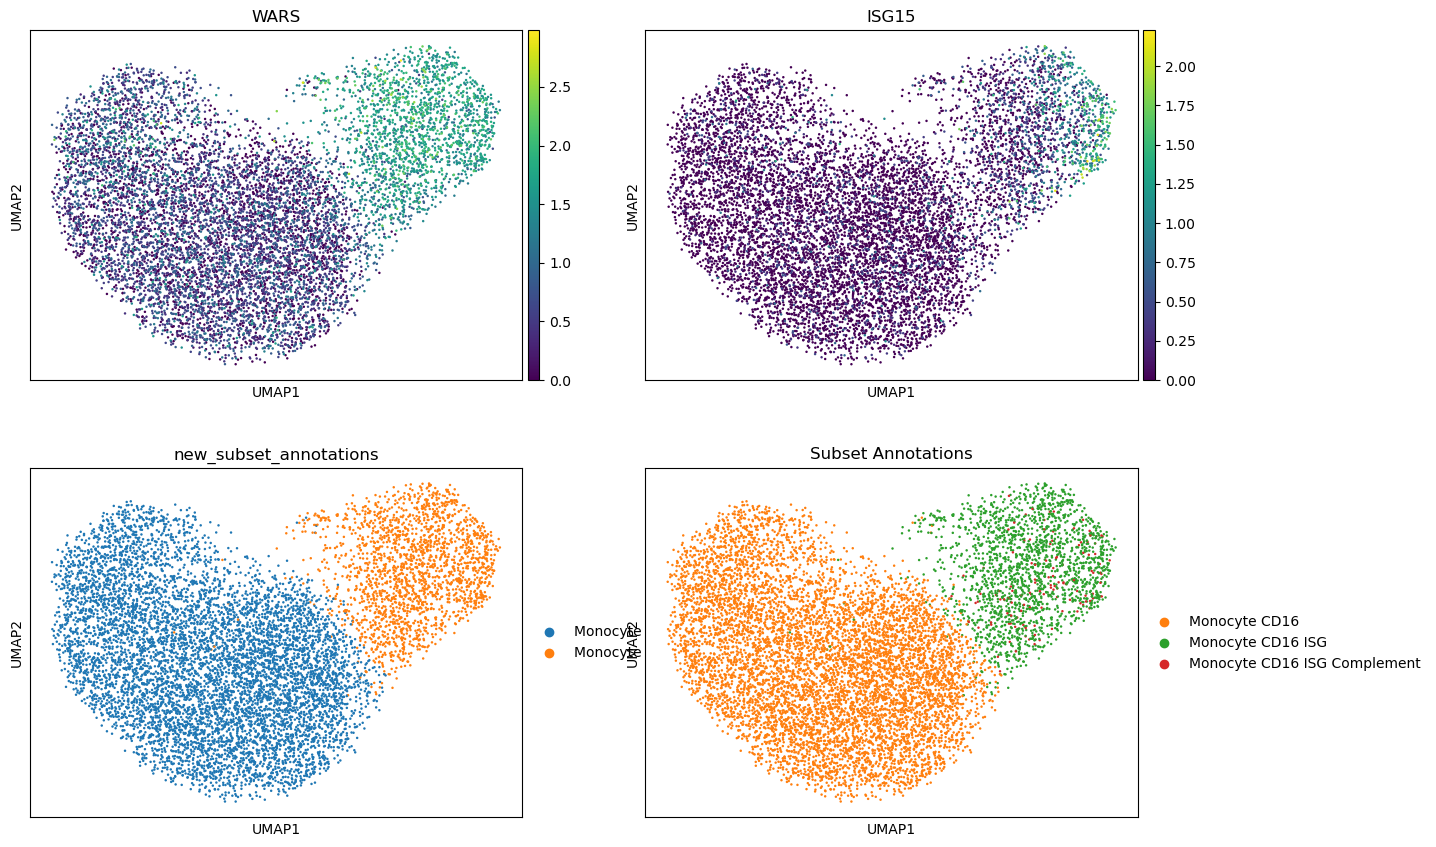

In [6]:
axs = sc.pl.umap(adata, color = ['WARS', 'ISG15', 'new_subset_annotations', 'new_subset_annotations_2'], ncols = 2, show=False)
axs[-1].set_title('Subset Annotations');

In [7]:
pbmc = sc.read_h5ad('adata-rna-adt-joint-1-annoted.h5ad')

In [12]:
pbmc_vc = utils.clean_visits(pbmc)

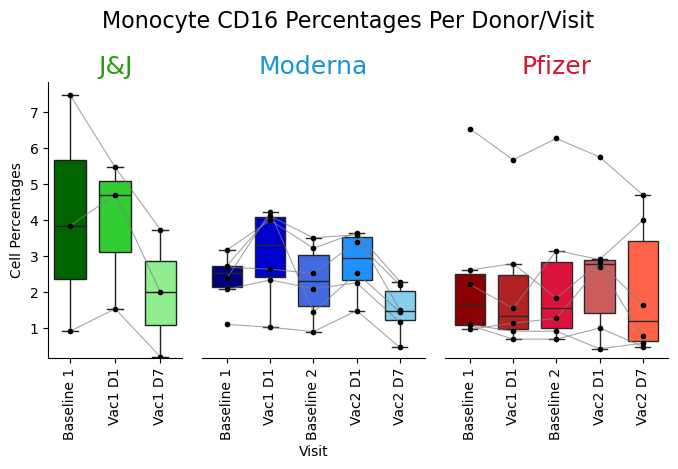

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [19]:
fig = my_plotting.cell_proportions_longitudinal_box_plot_2(pbmc_vc, 'Monocyte CD16', 'celltypes');
my_plotting.savefig_png_eps(fig, 'CD16 monocyte perc pbmc', False, True)